<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [4]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [74]:
### Tom's file location
#df = pd.read_csv(r"D:\HSLU_Projects\course_setting\Data\bereinigte_DATEN_ano_csv.csv")
### Christoph's file location
df = pd.read_excel("Data/bereinigte_DATEN_ano.xlsx")

In [75]:
df.head()

,Unnamed: 0,V1,athlete,gender,run,location,date,TurnNr,MinimalRadius,VelocityAtMinRadius,...,azitonextnext,HORIZONTALGATEDISTANCE,VERTICALGATEDISTANCE,regularbs1orfs2,steepness_A,filter_$,goofy2_regular1,@2Ferse_3Zehe_4Ferse,Zehen1_Fersen2,DistanzSchätz
0,0,35,3,1,1,Zermatt,200915,2,10.63,53.6,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
1,1,36,3,1,2,Zermatt,200915,2,11.05,52.3,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
2,2,37,3,1,3,Zermatt,200915,2,10.99,52.8,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
3,3,38,3,1,4,Zermatt,200915,2,11.41,52.2,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
4,4,39,5,1,1,Zermatt,200915,2,11.31,49.7,...,341.45477,8.515579,20.414966,1,2,0,2,3,1,30.635388


In [76]:
locations_and_turns = df[['location', 'TurnNr']]
turn_no = df['TurnNr'].unique()
location_set = df['location'].unique()

In [78]:
max(df['TurnNr'])

24

In [72]:
turn_no

array([16])

In [60]:
df = df.loc[df['location'] == 'Zermatt']
df = df.loc[df['TurnNr'] == 16]

In [61]:
df_clean = df.drop(["date", "location", "Unnamed0", "vectortonext", "vector2Dtonext", "vectortonextnorm", "vector2Dtonextnorm", "projpttonext", "vectortonextnext", "vector2Dtonextnext", "vectortonextnextnorm", "vector2Dtonextnextnorm"], axis=1)

In [62]:
df_clean.columns

Index(['Unnamed: 0', 'V1', 'athlete', 'gender', 'run', 'TurnNr',
       'MinimalRadius', 'VelocityAtMinRadius', 'VelocityAtTurnEntry',
       'VelocityAtTurnExit', 'TimeStarttoEnd', 'TimeStartToMinRad',
       'TimeMinRadToEnd', 'GlideTime_endtostart', 'TimeStarttoEnd_2',
       'Initiation', 'Completion', 'Gliding', 'GATEDISTANCE', 'dist2Dtonext',
       'STEEPNESS', 'azitonext', 'slopechangetonext', 'angletonext',
       'projtonext', 'offsettonext', 'dist3Dtonextnext', 'dts2Dtonextnext',
       'slopetonextnext', 'azitonextnext', 'HORIZONTALGATEDISTANCE',
       'VERTICALGATEDISTANCE', 'regularbs1orfs2', 'steepness_A', 'filter_$',
       'goofy2_regular1', '@2Ferse_3Zehe_4Ferse', 'Zehen1_Fersen2',
       'DistanzSchätz'],
      dtype='object')

In [63]:
features = df_clean.columns[4:17]

In [64]:
print(features)

Index(['run', 'TurnNr', 'MinimalRadius', 'VelocityAtMinRadius',
       'VelocityAtTurnEntry', 'VelocityAtTurnExit', 'TimeStarttoEnd',
       'TimeStartToMinRad', 'TimeMinRadToEnd', 'GlideTime_endtostart',
       'TimeStarttoEnd_2', 'Initiation', 'Completion'],
      dtype='object')


In [65]:
# distribute the dataset into two components X and Y
x = df_clean.iloc[:, 4:17]
y = df_clean.iloc[:, 2]

In [66]:
x

,run,TurnNr,MinimalRadius,VelocityAtMinRadius,VelocityAtTurnEntry,VelocityAtTurnExit,TimeStarttoEnd,TimeStartToMinRad,TimeMinRadToEnd,GlideTime_endtostart,TimeStarttoEnd_2,Initiation,Completion
455,1,16,11.53,55.2,60.7,58.9,1.00,0.56,0.44,0.00,1.00,0.560000,0.440000
456,2,16,11.40,54.9,60.9,57.9,1.00,0.52,0.48,0.24,1.24,0.419355,0.387097
457,3,16,12.07,56.1,61.9,60.3,1.04,0.56,0.48,0.24,1.28,0.437500,0.375000
458,4,16,12.12,55.1,60.2,57.8,1.08,0.56,0.52,0.00,1.08,0.518519,0.481481
459,1,16,12.39,56.3,59.7,61.0,1.04,0.56,0.48,0.28,1.32,0.424242,0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2,16,14.72,50.8,51.2,51.3,1.64,0.88,0.76,0.28,1.92,0.458333,0.395833
1146,3,16,15.78,49.6,50.1,51.5,1.72,0.76,0.96,0.32,2.04,0.372549,0.470588
1147,4,16,14.26,48.9,50.2,50.8,1.48,0.68,0.80,0.24,1.72,0.395349,0.465116
1148,5,16,14.24,50.0,50.0,51.4,1.64,0.88,0.76,0.32,1.96,0.448980,0.387755


In [67]:
results = {}

#df_clean_sub = df_clean.loc[df_clean['location'] == 'zermatt']

# distribute the dataset into two components X and Y
x = df_clean.iloc[:, 4:17]
y = df_clean.iloc[:, 2]

x_for_zermatt = x.loc[df['location'] == 'Zermatt']


n_components = 2
tsne = TSNE(n_components)


for locat in location_set:
    result = {}
    x_sub = x.loc[df['location'] == locat]
    no_of_turns = df.loc[df['location'] == locat]
    no_of_turns = no_of_turns['TurnNr'].unique()
    print("new_location")
    print(locat)
    for i in no_of_turns:
        new = i.astype('str')
        x_sub_sub = x_sub.loc[df['TurnNr'] == i]
        print("Something's Here!")
        answer = tsne.fit_transform(x_sub_sub)
        result[new] = answer
    results[locat] = result
    print("result_added")


new_location
Zermatt
Something's Here!
result_added
new_location
Stelvio
result_added
new_location
Diavolezza
result_added
new_location
Davos
result_added
new_location
Kreuzbergpass
result_added
new_location
Grindelwald
result_added
new_location
Simonhöhe
result_added


(1, 7)


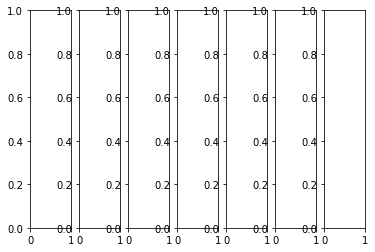

In [68]:
results_df = pd.DataFrame.from_dict(results)
print(results_df.shape)

fig, ax = plt.subplots(nrows=results_df.shape[0], ncols = results_df.shape[1])


In [70]:
results_df_ = results_df.iloc[1,1]

IndexError: single positional indexer is out-of-bounds

In [54]:
results_df_

nan

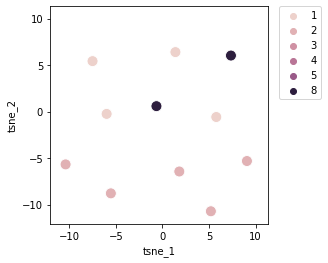

In [52]:
# We want to get TSNE embedding with 2 dimensions
#n_components = 2
#tsne = TSNE(n_components)
#tsne_result = tsne.fit_transform(x)
#tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images


 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': results_df_[:,0], 'tsne_2': results_df_[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)